<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Response Plot

Modeled from MatLab

Author: Gary Decosmo

Date Created: 9/27/2021

**Note this uses deprecated features of MatPlotLib**

Kp: 2.0
taus: 0.5
zeta: 0.15
Summary of response
rise time: 0.8705314960358076
peak time: 1.58877169505245
overshoot: 0.6208712729227059
decay ratio: 0.3854811375406612
period: 3.1775433901049


C:\Users\gsdec\AppData\Local\Temp/ipykernel_21676/454982252.py:111: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=txt,xy=tloc)
C:\Users\gsdec\AppData\Local\Temp/ipykernel_21676/454982252.py:115: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=txt,xy=tloc)
C:\Users\gsdec\AppData\Local\Temp/ipykernel_21676/454982252.py:119: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=txt,xy=tloc)
C:\Users\gsdec\AppData\Local\Temp/ipykernel_21676/454982252.py:123: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; suppo

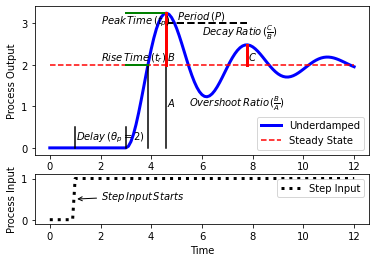

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from scipy.integrate import odeint

# specify number of steps
ns = 120
# define time points
t = np.linspace(0,ns/10.0,ns+1)

class model(object):
    # default process model
    Kp = 2.0
    taus = 0.5
    thetap = 2.0
    zeta = 0.15

def process(x,t,u,Kp,taus,zeta):
    # Kp = process gain
    # taus = second order time constant
    # zeta = damping factor
    # ts^2 dy2/dt2 + 2 zeta taus dydt + y = Kp u(t-thetap)
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*taus*dydt - y + Kp*u)/taus**2
    return [dydt,dy2dt2]

def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taus = m.taus
    thetap = m.thetap
    zeta = m.zeta

    print('Kp: ' + str(Kp))
    print('taus: ' + str(taus))
    print('zeta: ' + str(zeta))

    # specify number of steps
    ns = len(t)-1
    delta_t = t[1]-t[0]

    # storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros((ns+1,2))  # process variable

    # step input
    op[10:]=1.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t))

    # loop through time steps    
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        inputs = (op[iop],Kp,taus,zeta)
        y = odeint(process,pv[i],[0,delta_t],args=inputs)
        pv[i+1] = y[-1]
    return (pv,op)

# underdamped step response
(pv,op) = calc_response(t,model)

# rename parameters
tau = model.taus
zeta = model.zeta
du = 2.0
s = 3.0

# peak time
tp = np.pi * tau / np.sqrt(1.0-zeta**2)
# rise time
tr = tau / (np.sqrt(1.0-zeta**2)) * (np.pi-np.arccos(zeta))
# overshoot ratio
os = np.exp(-np.pi * zeta / (np.sqrt(1.0-zeta**2)))
# decay ratio
dr = os**2
# period
p = 2.0 * np.pi * tau / (np.sqrt(1.0-zeta**2))

print('Summary of response')
print('rise time: ' + str(tr))
print('peak time: ' + str(tp))
print('overshoot: ' + str(os))
print('decay ratio: ' + str(dr))
print('period: ' + str(p))

plt.figure(1)
g = gs.GridSpec(2, 1, height_ratios=[3, 1])
ap = {'arrowstyle': '->'}

plt.subplot(g[0])
plt.plot(t,pv[:,0],'b-',linewidth=3,label='Underdamped')
plt.plot([0,max(t)],[2.0,2.0],'r--',label='Steady State')
plt.plot([1,1],[0,0.5],'k-')
plt.plot([3,3],[0,0.5],'k-')
plt.plot([3+tr,3+tr],[0,2],'k-')
plt.plot([3+tp,3+tp],[0,2],'k-')
plt.plot([3,3+tr],[2,2],'g-',linewidth=2)
plt.plot([3,3+tp],[2*(1+os),2*(1+os)],'g-',linewidth=2)
plt.plot([3+tp,3+tp+p],[3,3],'k--',linewidth=2)
plt.plot([3+tp,3+tp],[2,2*(1.0+os)],'r-',linewidth=3)
plt.plot([3+tp+p,3+tp+p],[2,2*(1+os*dr)],'r-',linewidth=3)
plt.legend(loc=4)
plt.ylabel('Process Output')

tloc = (1.05,0.2)
txt = r'$Delay\,(\theta_p=2)$'
plt.annotate(s=txt,xy=tloc)

tloc = (2,2.1)
txt = r'$Rise\,Time\,(t_r)$'
plt.annotate(s=txt,xy=tloc)

tloc = (2,3)
txt = r'$Peak\,Time\,(t_p)$'
plt.annotate(s=txt,xy=tloc)

tloc = (5,3.1)
txt = r'$Period\,(P)$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+0.05,1.0)
txt = r'$A$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+0.05,2.1)
txt = r'$B$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+p+0.05,2.1)
txt = r'$C$'
plt.annotate(s=txt,xy=tloc)

tloc = (6,2.7)
txt = r'$Decay\,Ratio\,(\frac{C}{B})$'
plt.annotate(s=txt,xy=tloc)

tloc = (5.5,1.0)
txt = r'$Overshoot\,Ratio\,(\frac{B}{A})$'
plt.annotate(s=txt,xy=tloc)

plt.subplot(g[1])
plt.plot(t,op,'k:',linewidth=3,label='Step Input')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.ylabel('Process Input')
plt.xlabel('Time')

pt = (1.0,0.5)
tloc = (2.0,0.5)
txt = r'$Step\,Input\,Starts$'
plt.annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

plt.savefig('output.png')
plt.show()